Define wells/rock formation considered and paths for data retrieval

In [ ]:
WELLS = ["VW1", "CCS1"]
FORMATIONS = [ #comment out formations you don't want to look at
    "Eau Claire",
    "Mt. Simon E",
    "Mt. Simon D",
    "Mt. Simon C",
    "Mt. Simon B",
    "Mt. Simon A",
    "Argenta",
    "Precambrian"
    ]


DATALOGS_PATH = "REU Project/Data/Raw CSV Files/raw_"
LABELS_PATH = "REU Project/Data/labels/label_"

Imports

In [ ]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="statsmodels.stats.outliers_influence")

Retrieve Dataset

In [ ]:
def add_well_forms(dataset, labels_df, well):
  formation_path = "/content/drive/MyDrive/REU Project/Rock Formation Depths.xlsx"
  formation_pd = pd.read_excel(formation_path, header=0)
  filtered_formations = formation_pd[formation_pd["Well"] == well]
  for index, row in dataset.iterrows():
    dept = row["DEPT"]
    for index2, row2 in filtered_formations.iterrows():
      min_dept = row2["Min Dept"]
      max_dept = row2["Max Dept"]
      if dept >= min_dept and dept < max_dept:
        dataset.loc[index, 'FORM'] = row2["Structure"]
        dataset.loc[index, 'WELL-FORM'] = well + "-" + row2["Structure"]

  return dataset

In [ ]:
datalogs = {}
labels = {}
datasets = {}
for well in WELLS:
  datalogs_df = pd.read_csv(DATALOGS_PATH + well + ".csv")
  labels_df = pd.read_csv(LABELS_PATH + well + ".csv")

  #filter rock formations considered
  datalogs_df = datalogs_df[datalogs_df["FORM"].isin(FORMATIONS)]

  datalogs[well] = datalogs_df
  print(well + str(datalogs_df.shape))
  labels[well] = labels_df

  dataset = pd.merge(datalogs_df, labels_df, on='DEPT')
  datasets[well] = dataset

data = pd.concat(datasets.values())
print("Concatenated", data.shape)

VW1(3999, 24)
CCS1(4217, 24)
Concatenated (8216, 25)


Scale Data and Remove Non-Numerical Features

In [ ]:
data = data.drop(["DEPT", "HAS_FRAC", "FORM"], axis=1)

#scale data
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0, 1))
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Make A Correlation Heatmap

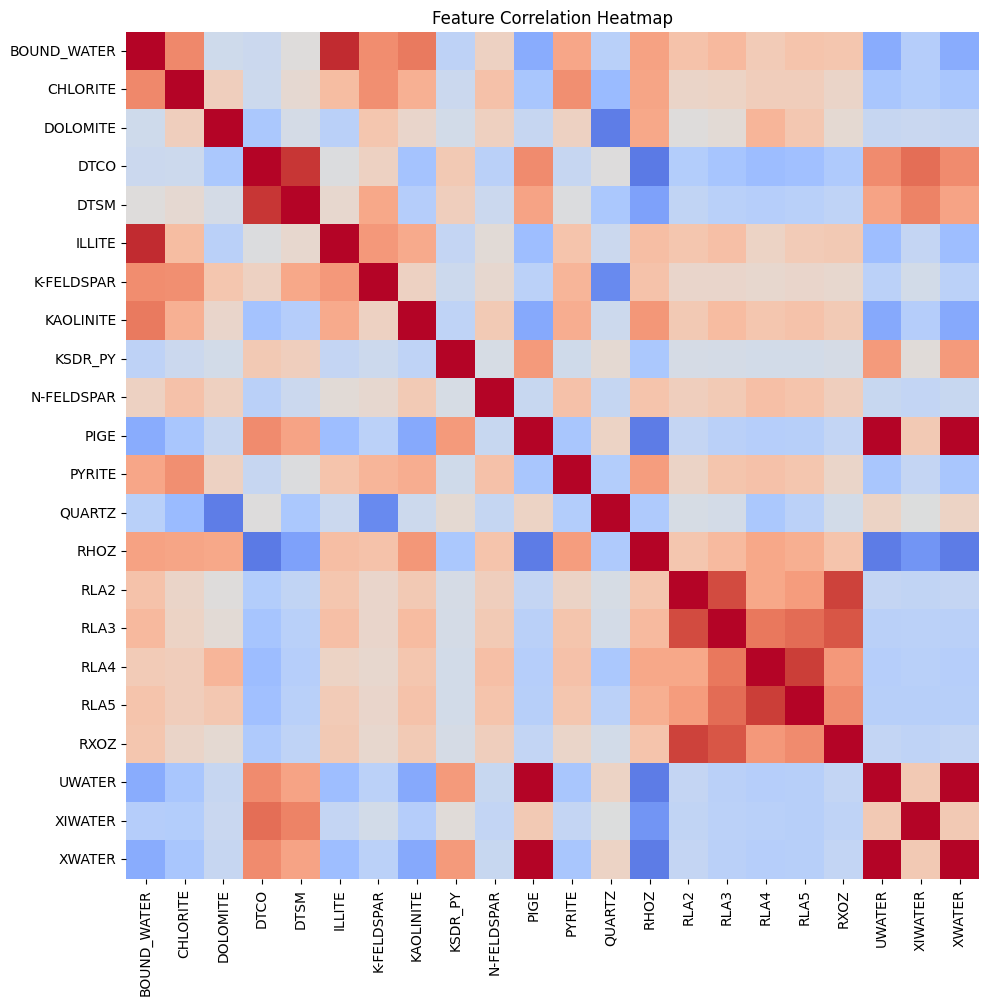

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, annot=False, cbar=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
#plt.savefig('FeatCorrelationHeatmap.png', format='png', dpi=1200)
plt.show()

Perform VIF Analysis (all features)

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Feature"] = data.columns

# calculating VIF (Variance Inflation Factor) for each feature
vif_data["VIF"] = [round(variance_inflation_factor(data.values, i), 1)
                    for i in range(len(data.columns))]

# print VIFS for each feature (generally, want all VIF scores to be <= 5 for an
# dataset that isn't highly correlated)
print(vif_data)

#print correlation between all features
corr = data.corr()
corr

        Feature        VIF
0   BOUND_WATER     3558.1
1      CHLORITE      249.1
2      DOLOMITE       10.0
3          DTCO       15.4
4          DTSM       11.8
5        ILLITE     1992.0
6    K-FELDSPAR        9.1
7     KAOLINITE      202.1
8       KSDR_PY        1.4
9    N-FELDSPAR        1.3
10         PIGE  7048747.0
11       PYRITE        2.7
12       QUARTZ       19.7
13         RHOZ       18.5
14         RLA2        5.4
15         RLA3        6.1
16         RLA4        5.6
17         RLA5        4.8
18         RXOZ        4.2
19       UWATER        inf
20      XIWATER        8.2
21       XWATER        inf


,BOUND_WATER,CHLORITE,DOLOMITE,DTCO,DTSM,ILLITE,K-FELDSPAR,KAOLINITE,KSDR_PY,N-FELDSPAR,...,QUARTZ,RHOZ,RLA2,RLA3,RLA4,RLA5,RXOZ,UWATER,XIWATER,XWATER
BOUND_WATER,1.000000,0.579588,-0.108815,-0.129330,0.011503,0.924720,0.560372,0.642717,-0.213879,0.146199,...,-0.245330,0.458664,0.259563,0.320442,0.202486,0.256351,0.236034,-0.521580,-0.271857,-0.521580
CHLORITE,0.579588,1.000000,0.171100,-0.120512,0.064378,0.297903,0.549689,0.377611,-0.130225,0.268817,...,-0.427109,0.439157,0.115775,0.126279,0.177521,0.177307,0.110360,-0.337879,-0.277478,-0.337879
DOLOMITE,-0.108815,0.171100,1.000000,-0.326550,-0.063586,-0.239495,0.238354,0.094169,-0.078975,0.148645,...,-0.771805,0.426127,0.010426,0.041271,0.345607,0.231378,0.055560,-0.159863,-0.146124,-0.159863
DTCO,-0.129330,-0.120512,-0.326550,1.000000,0.890889,-0.013520,0.148053,-0.362424,0.216401,-0.240495,...,0.004745,-0.787897,-0.277466,-0.348985,-0.413710,-0.386157,-0.298712,0.566337,0.690511,0.566337
DTSM,0.011503,0.064378,-0.063586,0.890889,1.000000,0.079016,0.424275,-0.269723,0.166123,-0.131113,...,-0.321994,-0.582536,-0.190900,-0.242747,-0.258321,-0.245768,-0.205925,0.448041,0.602849,0.448041
ILLITE,0.924720,0.297903,-0.239495,-0.013520,0.079016,1.000000,0.505372,0.406454,-0.172439,0.036980,...,-0.132710,0.290933,0.237053,0.285939,0.131212,0.196178,0.211522,-0.405163,-0.177274,-0.405163
K-FELDSPAR,0.560372,0.549689,0.238354,0.148053,0.424275,0.505372,1.000000,0.141462,-0.121739,0.073867,...,-0.708700,0.260061,0.096583,0.094761,0.081354,0.095006,0.082965,-0.229068,-0.084960,-0.229068
KAOLINITE,0.642717,0.377611,0.094169,-0.362424,-0.269723,0.406454,0.141462,1.000000,-0.209465,0.207512,...,-0.124756,0.510805,0.217477,0.308547,0.240331,0.264328,0.204044,-0.534044,-0.267985,-0.534044
KSDR_PY,-0.213879,-0.130225,-0.078975,0.216401,0.166123,-0.172439,-0.121739,-0.209465,1.000000,-0.052259,...,0.062397,-0.322318,-0.056491,-0.069898,-0.083849,-0.080670,-0.058350,0.495135,0.029328,0.495135
N-FELDSPAR,0.146199,0.268817,0.148645,-0.240495,-0.131113,0.036980,0.073867,0.207512,-0.052259,1.000000,...,-0.169323,0.253670,0.164705,0.209042,0.285593,0.252720,0.167780,-0.153366,-0.184507,-0.153366


VIF Analysis For Experimentation (choose which features are included)

In [ ]:
#define which features you want to include and filter dataset
to_include_list = ["RLA5", "N-FELDSPAR", "DOLOMITE",  "ILLITE", "RLA2", "RLA4",
                   "PYRITE", "CHLORITE", "RHOZ", "KSDR_PY"]
filtered_data = data[sorted(to_include_list)]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = filtered_data.columns
# calculating VIF for each feature
vif_data["VIF"] = [round(variance_inflation_factor(filtered_data.values, i), 2)
                          for i in range(len(filtered_data.columns))]

# print VIFS for each feature (generally, want all VIF scores to be <= 5 for an
# dataset that isn't highly correlated)
print(vif_data)

#print correlation between all features
corr = data.corr()
corr

      feature   VIF
0    CHLORITE  1.62
1    DOLOMITE  1.62
2      ILLITE  1.45
3     KSDR_PY  1.14
4  N-FELDSPAR  1.18
5      PYRITE  1.67
6        RHOZ  2.11
7        RLA2  1.37
8        RLA4  4.62
9        RLA5  4.49


,BOUND_WATER,CHLORITE,DOLOMITE,DTCO,DTSM,ILLITE,K-FELDSPAR,KAOLINITE,KSDR_PY,N-FELDSPAR,...,QUARTZ,RHOZ,RLA2,RLA3,RLA4,RLA5,RXOZ,UWATER,XIWATER,XWATER
BOUND_WATER,1.000000,0.579588,-0.108815,-0.129330,0.011503,0.924720,0.560372,0.642717,-0.213879,0.146199,...,-0.245330,0.458664,0.259563,0.320442,0.202486,0.256351,0.236034,-0.521580,-0.271857,-0.521580
CHLORITE,0.579588,1.000000,0.171100,-0.120512,0.064378,0.297903,0.549689,0.377611,-0.130225,0.268817,...,-0.427109,0.439157,0.115775,0.126279,0.177521,0.177307,0.110360,-0.337879,-0.277478,-0.337879
DOLOMITE,-0.108815,0.171100,1.000000,-0.326550,-0.063586,-0.239495,0.238354,0.094169,-0.078975,0.148645,...,-0.771805,0.426127,0.010426,0.041271,0.345607,0.231378,0.055560,-0.159863,-0.146124,-0.159863
DTCO,-0.129330,-0.120512,-0.326550,1.000000,0.890889,-0.013520,0.148053,-0.362424,0.216401,-0.240495,...,0.004745,-0.787897,-0.277466,-0.348985,-0.413710,-0.386157,-0.298712,0.566337,0.690511,0.566337
DTSM,0.011503,0.064378,-0.063586,0.890889,1.000000,0.079016,0.424275,-0.269723,0.166123,-0.131113,...,-0.321994,-0.582536,-0.190900,-0.242747,-0.258321,-0.245768,-0.205925,0.448041,0.602849,0.448041
ILLITE,0.924720,0.297903,-0.239495,-0.013520,0.079016,1.000000,0.505372,0.406454,-0.172439,0.036980,...,-0.132710,0.290933,0.237053,0.285939,0.131212,0.196178,0.211522,-0.405163,-0.177274,-0.405163
K-FELDSPAR,0.560372,0.549689,0.238354,0.148053,0.424275,0.505372,1.000000,0.141462,-0.121739,0.073867,...,-0.708700,0.260061,0.096583,0.094761,0.081354,0.095006,0.082965,-0.229068,-0.084960,-0.229068
KAOLINITE,0.642717,0.377611,0.094169,-0.362424,-0.269723,0.406454,0.141462,1.000000,-0.209465,0.207512,...,-0.124756,0.510805,0.217477,0.308547,0.240331,0.264328,0.204044,-0.534044,-0.267985,-0.534044
KSDR_PY,-0.213879,-0.130225,-0.078975,0.216401,0.166123,-0.172439,-0.121739,-0.209465,1.000000,-0.052259,...,0.062397,-0.322318,-0.056491,-0.069898,-0.083849,-0.080670,-0.058350,0.495135,0.029328,0.495135
N-FELDSPAR,0.146199,0.268817,0.148645,-0.240495,-0.131113,0.036980,0.073867,0.207512,-0.052259,1.000000,...,-0.169323,0.253670,0.164705,0.209042,0.285593,0.252720,0.167780,-0.153366,-0.184507,-0.153366


Random search to find set of n features where all VIF scores are under a certain amount and minimizes the sum or average of VIF scores

In [ ]:
def calculate_vif(data, cols):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = cols
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                              for i in range(len(data.columns))]
    return vif_data

def find_max_vif_combo(data, max_vif=5, num_combos=100, to_include=[],
                       metric_type="sum", n_features=10):
    features = data.columns.to_list()
    max_features = []
    min_met = 1e30 #just make higher than any VIF score besides inf

    # Choose num_features random combinations to run vif on and compare
    for _ in range(num_combos):
        if _ % 500 == 0: print("tried " + str(_) + " combinations") #checkup
        # Generate all combinations of features
        feature_combo = np.random.choice(features, n_features, replace=False)
        feature_combo = list(feature_combo)

        #assure that certain features are included
        for feat in to_include:
          if feat not in feature_combo:
            feature_combo.append(feat)

        #get VIF scores for feature set
        curr_data = data[feature_combo]
        vif_data = calculate_vif(curr_data, feature_combo)
        max_vif_value = vif_data['VIF'].max()

        #keep track of feature set/VIF sum where all VIFs under max_vif and
        #minimizes the sum of VIF scores
        if max_vif_value <= max_vif:
          #calculate sum or average VIF score
          if metric_type.lower() == "sum":
            new_met = vif_data['VIF'].sum()
          elif metric_type.lower() == "average":
            new_met = np.mean(vif_data['VIF'].values)
          else:
            print("Invalid Metric Type")
            return

          if new_met < min_met:
            print("found combo where all VIF values <", max_vif_value)
            max_features = feature_combo
            min_met = new_met

    return max_features

#set hyperparameters and find best combo
MAX_VIF = 5             #maximum amount VIF score for algorithms
NUM_COMBOS = 1000       #number of iterations for random search algorithm
TO_INCLUDE = ["RHOZ"]   #features guaranteed to be in best combo
METRIC_TYPE = "average" #"best" combo quantified by average or sum
N_FEATURES = 10         #number of features in combos
max_vif_features = find_max_vif_combo(data, max_vif=MAX_VIF,
num_combos=NUM_COMBOS, to_include=TO_INCLUDE, metric_type=METRIC_TYPE,
                                      n_features = N_FEATURES)

#print results
print("Features with VIF <=", MAX_VIF, "and minimized", METRIC_TYPE, ":",
                                                        (len(max_vif_features)))

print("Best Combo:")
vif = calculate_vif(data[max_vif_features], max_vif_features)
print(vif)

tried 0 combinations
found combo where all VIF values < 3.5403901546170564
found combo where all VIF values < 3.703289822462222
found combo where all VIF values < 3.7576893700686527
found combo where all VIF values < 3.384643891717184
tried 500 combinations
Features with VIF <= 5 and minimized average : 8
Best Combo:
      Feature       VIF
0  N-FELDSPAR  1.144622
1      QUARTZ  1.189089
2      PYRITE  1.459844
3      ILLITE  1.375659
4        PIGE  3.071878
5   KAOLINITE  1.647904
6        RHOZ  3.384644
7        RLA3  1.227576


Random search to find set of features where all VIF scores are under a certain amount and has a maximal amount of features

In [ ]:
def calculate_vif(data, cols):
    vif_data = pd.DataFrame()
    vif_data["feature"] = cols
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                              for i in range(len(data.columns))]
    return vif_data

def find_max_vif_combo(data, max_vif=5, num_combos=100, to_include=[]):
    features = data.columns.to_list()
    max_features = []
    max_vif_count = 0
    min_sum = 1e30

    # Choose num_features random combinations to run vif on and compare
    for _ in range(num_combos):
        if _ % 500 == 0: print("tried " + str(_) + " combinations") #checkup
        num_features = np.random.randint(10, 15) #based on experimenttion
        # Generate all combinations of features
        feature_combo = list(np.random.choice(features, num_features,
                                              replace=False))

        #assure that certain features are included
        for feat in to_include:
          if feat not in feature_combo:
            feature_combo.append(feat)

        curr_data = data[feature_combo]
        vif_data = calculate_vif(curr_data, feature_combo)
        max_vif_value = vif_data['VIF'].max()

        if max_vif_value <= max_vif and len(feature_combo) >= max_vif_count:
          print("found combo where all VIF values <", max_vif_value)
          if len(feature_combo) == max_vif_count:
            #breaks tie by comparing VIF sums
            new_sum = vif_data['VIF'].sum()
            if new_sum < min_sum:
              max_features = feature_combo
              min_sum = new_sum

          if len(feature_combo) > max_vif_count:
            max_vif_count = len(feature_combo)
            max_features = feature_combo
            min_sum = vif_data['VIF'].sum()

    return max_features


#set hyperparameters and find best combo
MAX_VIF = 5               #maximum amount VIF score for algorithms
NUM_COMBOS = 1000         #number of iterations for random search algorithm
TO_INCLUDE = ["RHOZ"]     #features guaranteed to be included
max_vif_features = find_max_vif_combo(data, max_vif=MAX_VIF,
                                num_combos = NUM_COMBOS, to_include=TO_INCLUDE)

#print results
print("Features with VIF <=", MAX_VIF, "and maximum number of features:",
(len(max_vif_features)))
print("Best Combo:")
vif = calculate_vif(data[max_vif_features], max_vif_features)
print(vif)

tried 0 combinations
found combo where all VIF values < 3.5399904128470543
found combo where all VIF values < 4.871220939916827
found combo where all VIF values < 4.64937464079087
found combo where all VIF values < 4.9908648585093465
tried 500 combinations
found combo where all VIF values < 4.9958752582087795
Features with VIF <= 5 and maximum number of features: 13
Best Combo:
       feature       VIF
0         RLA2  1.388747
1         RLA4  4.995875
2      KSDR_PY  1.353407
3   N-FELDSPAR  1.191210
4       ILLITE  2.120026
5         RHOZ  3.608511
6    KAOLINITE  1.811592
7       UWATER  3.682543
8         RLA5  4.549465
9       QUARTZ  3.275592
10      PYRITE  1.721276
11  K-FELDSPAR  4.425243
12    CHLORITE  2.038717
